## Prerequsite Imports

In [1]:
# import for CNN model
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import soundfile as sf

# import for MLPclassifier model
import librosa
import soundfile
import glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## EDA

Male Neutral

In [2]:
# EDA: Getting to know the dataset better

# LOAD IN FILE
x, sr = librosa.load('Actor_01/03-01-01-01-01-01-01.wav')


Text(0.5, 1.0, 'Waveplot - Male Neutral')

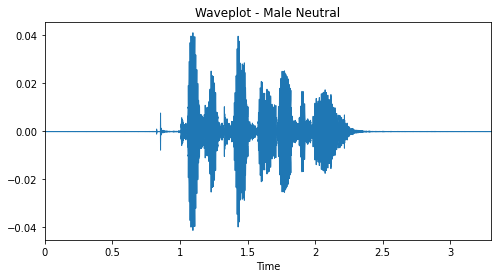

In [3]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')


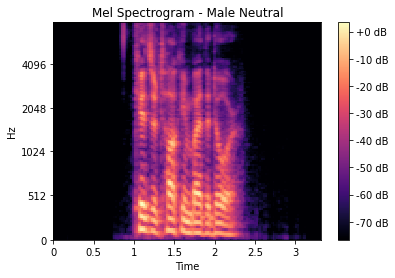

In [4]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB')

Female Calm

In [38]:
# LOAD IN FILE
x, sr = librosa.load('Actor_02/03-01-02-01-01-01-02.wav')

Text(0.5, 1.0, 'Waveplot - Female Calm')

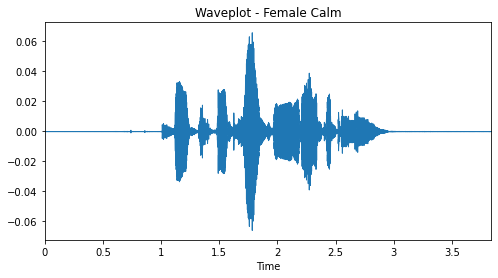

In [39]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')

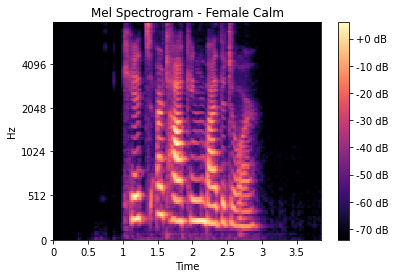

In [41]:
#LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Calm')
plt.colorbar(format='%+2.0f dB')

Male Happy

In [42]:
x, sr = librosa.load('Actor_03/03-01-03-01-01-01-03.wav')

Text(0.5, 1.0, 'Waveplot - Male Happy')

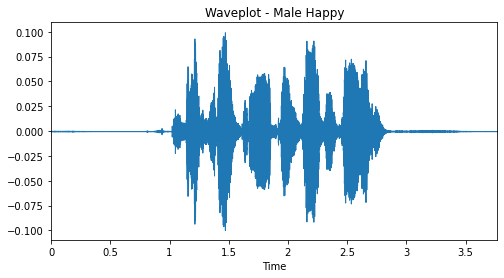

In [43]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')

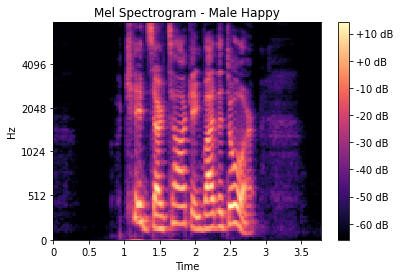

In [44]:
# LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB')

Feamle Sad

In [45]:
x, sr = librosa.load('Actor_04/03-01-04-01-01-01-04.wav')

Text(0.5, 1.0, 'Waveplot - Female Sad')

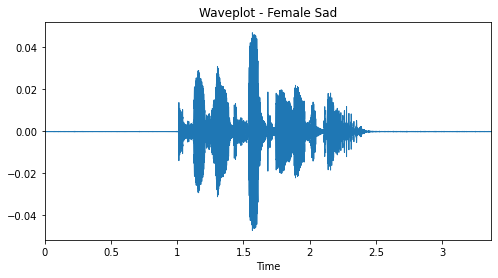

In [46]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')

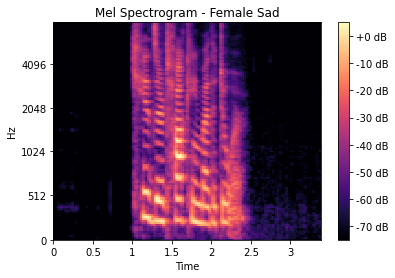

In [47]:
# LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Sad')
plt.colorbar(format='%+2.0f dB')

Male Angry

In [48]:
x, sr = librosa.load('Actor_05/03-01-05-01-01-01-05.wav')

Text(0.5, 1.0, 'Waveplot - Male Angry')

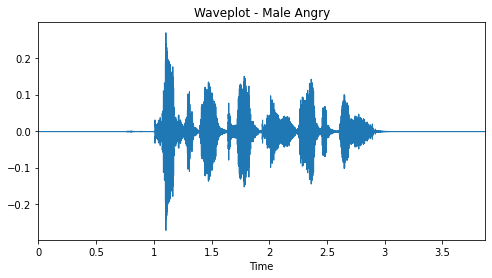

In [49]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')

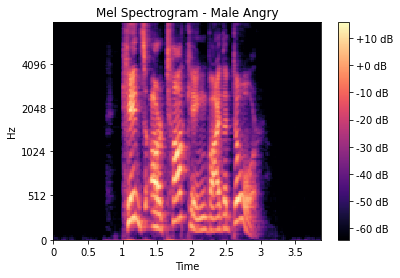

In [50]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Angry')
plt.colorbar(format='%+2.0f dB')

Female Fearful

In [51]:
x, sr = librosa.load('Actor_06/03-01-06-01-01-01-06.wav')

Text(0.5, 1.0, 'Waveplot - Female Fearful')

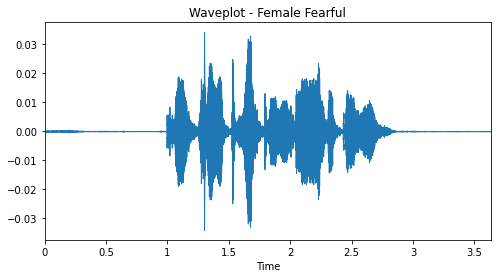

In [52]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')

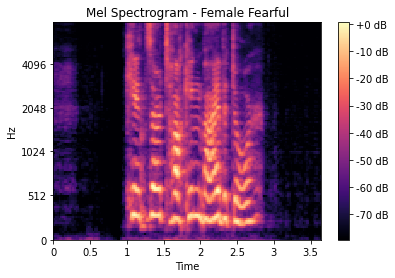

In [53]:
# LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB')

Male Disgust

In [54]:
x, sr = librosa.load('Actor_07/03-01-07-01-01-01-07.wav')

Text(0.5, 1.0, 'Waveplot - Male Disgust')

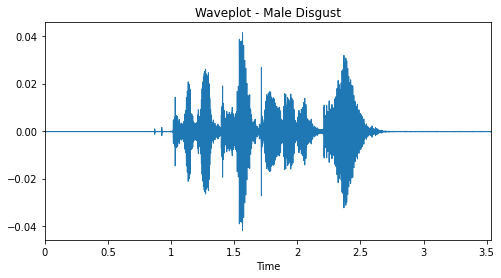

In [55]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')

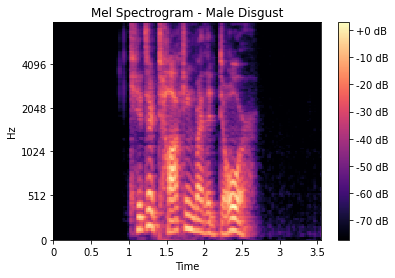

In [56]:
# LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Disgust')
plt.colorbar(format='%+2.0f dB')

Female Surprised

In [57]:
x, sr = librosa.load('Actor_08/03-01-08-01-01-01-08.wav')

Text(0.5, 1.0, 'Waveplot - FemaleSurprised')

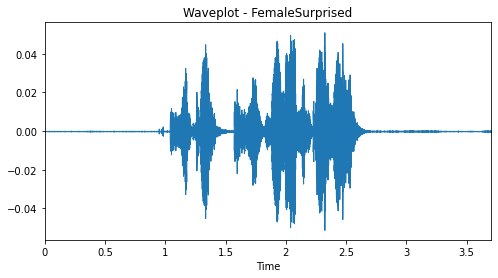

In [58]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')

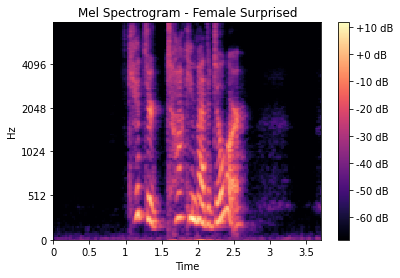

In [59]:
# LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB')

## Feature Extraction

In [5]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:10]

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10']

In [6]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [7]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor), pd.DataFrame(file_path)],axis=1)
audio_df.columns = ['gender','emotion','actor', 'path']
audio_df

,gender,emotion,actor,path
0,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...
1,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...
2,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...
3,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...
4,male,calm,1,audio_speech_actors_01-24/Actor_01/03-01-02-01...
...,...,...,...,...
1435,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-01...
1436,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...
1437,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...
1438,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...


In [8]:
# pd.set_option('display.max_colwidth', -1)
# audio_df.sample(10)

<AxesSubplot:>

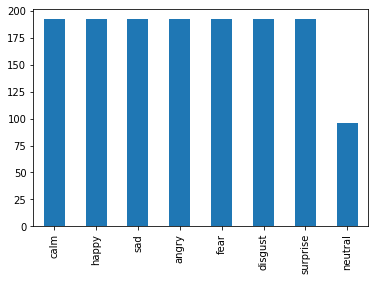

In [9]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [10]:
audio_df.to_csv('audio.csv')

In [11]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-76.38477, -76.38477, -76.38477, -76.38477, -..."
1,"[-75.33552, -75.44532, -75.55403, -75.20395, -..."
2,"[-75.15071, -75.15071, -75.15071, -75.15071, -..."
3,"[-75.26845, -75.26845, -75.26845, -75.26845, -..."
4,"[-80.14738, -80.14738, -80.14738, -80.14738, -..."


In [12]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [13]:
df_combined

,gender,emotion,actor,path,0,1,2,3,4,5,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,audio_speech_actors_01-24/Actor_01/03-01-01-01...,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,audio_speech_actors_01-24/Actor_01/03-01-02-01...,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,...,-80.147377,-80.147377,-80.121956,-79.998009,-80.119255,-80.147377,-80.130417,-80.014702,-80.147377,-80.147377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-01...,-66.861420,-66.861420,-64.904045,-64.663895,-66.493378,-66.080986,...,-66.856087,-66.763268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...,-62.385349,-62.385349,-62.385349,-62.385349,-62.385349,-62.385349,...,-62.381603,-62.385349,-62.385349,-62.347351,-62.385349,-62.385349,-62.347870,-62.358158,-62.385349,-62.324200
1437,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.515343,...,-65.430077,-65.515594,-65.515594,-65.515594,-65.515594,-65.515594,-65.503250,-65.504204,-65.485886,-65.328995
1438,female,surprise,24,audio_speech_actors_01-24/Actor_24/03-01-08-02...,-63.501076,-63.501076,-63.420914,-62.750462,-59.716866,-55.641666,...,-62.756214,-62.906693,-62.763382,-62.752354,-63.128231,-63.439457,-63.484074,-63.420380,-63.217319,-63.165489


In [14]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,-75.653793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,...,-80.147377,-80.147377,-80.121956,-79.998009,-80.119255,-80.147377,-80.130417,-80.014702,-80.147377,-80.147377


In [15]:
df_combined.to_csv('df_master.csv')

In [15]:
df_combined['actor']

0        1
1        1
2        1
3        1
4        1
        ..
1435    24
1436    24
1437    24
1438    24
1439    24
Name: actor, Length: 1440, dtype: int64

DATA PREPROCESSING

In [20]:
accuracy_table = pd.read_csv('accuracy_table.csv')

In [21]:
accuracy_table

,data,CNN model recall(%),MLPclassifier recall(%),CNN model loss(%),MLPclassifier loss(%)
0,Master,88.54167,76.04166,2.34422,1.58354
1,df_female,84.72222,80.55555,2.48831,1.43293
2,df_male,79.86111,69.44444,2.54078,1.53088
3,df_rand_1200,90.41666,85.22223,2.33352,1.61064
4,df_rand_1150,82.60869,77.04347,2.38137,1.61304
5,df_rand_1300,86.15385,77.30697,2.34422,1.77449


In [22]:
from scipy import stats

In [27]:
stats.anderson(accuracy_table['MLPclassifier loss(%)'], dist='norm')

AndersonResult(statistic=0.2852919127490505, critical_values=array([0.592, 0.675, 0.809, 0.944, 1.123]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Paired T-Test

In [34]:
accuracy_table['CNN model recall(%)'].mean()

85.38403333333333

In [35]:
accuracy_table['MLPclassifier recall(%)'].mean()

77.60238666666667

In [36]:
accuracy_table['CNN model loss(%)'].mean()

2.4054033333333336

In [37]:
accuracy_table['MLPclassifier loss(%)'].mean()

1.59092

In [32]:
stats.ttest_rel(accuracy_table['CNN model recall(%)'], accuracy_table['MLPclassifier recall(%)'])

Ttest_relResult(statistic=5.7463268947918404, pvalue=0.0022378913548924506)

In [33]:
stats.ttest_rel(accuracy_table['CNN model loss(%)'], accuracy_table['MLPclassifier loss(%)'])

Ttest_relResult(statistic=10.834473236954933, pvalue=0.00011625729947618743)